# Speech Regognition with Keras

In [3]:
import os
import librosa
import tensorflow as tf
from IPython.display import Audio, display,update_display
import numpy as np

In [4]:

print(os.getcwd())
print(os.path.exists('../../.kaggle/16000_pcm_speeches/Benjamin_Netanyau/'))

/Users/ginovalverde/projects/deep_learning/notebooks
True


In [5]:
DATASET_ROOT = '../../.kaggle/16000_pcm_speeches'
BENJAMIN_DATA= os.path.join(DATASET_ROOT, "Benjamin_Netanyau")
JENS_DATA= os.path.join(DATASET_ROOT, "Jens_Stoltenberg")
JULIA_DATA=os.path.join(DATASET_ROOT, "Julia_Gillard")
MARGARET_DATA=os.path.join(DATASET_ROOT, "Magaret_Tarcher")
NELSON_DATA=os.path.join(DATASET_ROOT, "Nelson_Mandela")

In [6]:
for name in ["Benjamin_Netanyau", "Jens_Stoltenberg", "Julia_Gillard", "Margaret_Thatcher", "Nelson_Mandela"]:
    full_path = os.path.join(DATASET_ROOT, name)
    print(f"{name}: {full_path} -> {os.path.exists(full_path)}")

Benjamin_Netanyau: ../../.kaggle/16000_pcm_speeches/Benjamin_Netanyau -> True
Jens_Stoltenberg: ../../.kaggle/16000_pcm_speeches/Jens_Stoltenberg -> True
Julia_Gillard: ../../.kaggle/16000_pcm_speeches/Julia_Gillard -> True
Margaret_Thatcher: ../../.kaggle/16000_pcm_speeches/Margaret_Thatcher -> False
Nelson_Mandela: ../../.kaggle/16000_pcm_speeches/Nelson_Mandela -> True


In [7]:
def parse_dataset(dataset_paths):
    X=[]
    y=[]
    for index, dataset in enumerate(dataset_paths):
        print(f"Parsing dataset {dataset}...".format(dataset))
        for fname in os.listdir(dataset):
            wav,sr=librosa.load(os.path.join(dataset, fname), sr=None)
            D=librosa.amplitude_to_db(np.abs(librosa.stft(wav)), ref=np.max)
            X.append(D)
            y.append(index)
    return(X,y)

In [8]:
X,y =parse_dataset([BENJAMIN_DATA, JENS_DATA, JULIA_DATA, MARGARET_DATA, NELSON_DATA])

Parsing dataset ../../.kaggle/16000_pcm_speeches/Benjamin_Netanyau...
Parsing dataset ../../.kaggle/16000_pcm_speeches/Jens_Stoltenberg...
Parsing dataset ../../.kaggle/16000_pcm_speeches/Julia_Gillard...
Parsing dataset ../../.kaggle/16000_pcm_speeches/Magaret_Tarcher...
Parsing dataset ../../.kaggle/16000_pcm_speeches/Nelson_Mandela...


In [9]:
len(X)

7501

## Dataset split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [11]:
X_test,X_val,y_test,y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [12]:
print("Longitud del subconjunto de entrenamiento: ", len(X_train))
print("Longitud del subconjunto de validación: ", len(X_val))
print("Longitud del subconjunto de prueba: ", len(X_test))

Longitud del subconjunto de entrenamiento:  6750
Longitud del subconjunto de validación:  376
Longitud del subconjunto de prueba:  375


## Model building

In [13]:

from tensorflow.keras.utils import to_categorical


def prep_dataset(X,y,shape):
    X_prep=np.array(X).reshape((len(X),shape))
    X_prep=X_prep.astype('float32')/255
    y_prep=to_categorical(np.array(y))
    return(X_prep,y_prep)

In [14]:
X_train_prep,y_train_prep=prep_dataset(X_train,y_train,1025*32)
X_test_prep,y_test_prep=prep_dataset(X_test,y_test,1025*32)
X_val_prep,y_val_prep=prep_dataset(X_val,y_val,1025*32)

In [15]:
X_train_prep

array([[-0.17525421, -0.14209981, -0.15180011, ..., -0.3137255 ,
        -0.257259  , -0.21863231],
       [-0.15785214, -0.18190505, -0.28388077, ..., -0.3137255 ,
        -0.26277477, -0.22474979],
       [-0.16566075, -0.17889608, -0.23556474, ..., -0.3137255 ,
        -0.2649995 , -0.22617863],
       ...,
       [-0.16005155, -0.19701648, -0.24735786, ..., -0.3137255 ,
        -0.3137255 , -0.3137255 ],
       [-0.15187734, -0.1524555 , -0.2087213 , ..., -0.3137255 ,
        -0.2792863 , -0.2410894 ],
       [-0.10384219, -0.09117542, -0.11278369, ..., -0.3137255 ,
        -0.2572689 , -0.21818061]], dtype=float32)

In [16]:
y_train_prep

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

## Training the NNA 

In [17]:
from sklearn.neural_network import MLPClassifier

clf=MLPClassifier(hidden_layer_sizes=(10, ),activation='logistic',solver='sgd')
clf.fit(X_train_prep,y_train)

/Users/ginovalverde/projects/deep_learning/dlenv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ginovalverde/projects/deep_learning/dlenv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ginovalverde/projects/deep_learning/dlenv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ginovalverde/projects/deep_learning/dlenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), solver='sgd')

In [18]:
y_pred=clf.predict(X_val_prep)

/Users/ginovalverde/projects/deep_learning/dlenv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ginovalverde/projects/deep_learning/dlenv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ginovalverde/projects/deep_learning/dlenv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,y_pred)

0.9414893617021277

## Deep neural network

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [21]:
network=models.Sequential()

network.add(layers.Dense(300,activation='relu',input_shape=(1025*32,)))
network.add(layers.Dense(300,activation='relu'))
network.add(layers.Dense(100,activation='relu'))
network.add(layers.Dense(5,activation='softmax')) # Output layer with 5 neurons (one for each speaker)


/Users/ginovalverde/projects/deep_learning/dlenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
network.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy','Precision'])

In [23]:
len(y_train_prep)

6750

In [24]:
history=network.fit(X_train_prep,
                    y_train_prep,
                    epochs=30,
                    validation_data=(X_val_prep,y_val_prep))

Epoch 1/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - Precision: 0.3453 - accuracy: 0.3251 - loss: 1.5009 - val_Precision: 0.9706 - val_accuracy: 0.6356 - val_loss: 1.0558
Epoch 2/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - Precision: 0.7287 - accuracy: 0.5256 - loss: 1.1101 - val_Precision: 0.7205 - val_accuracy: 0.4920 - val_loss: 1.1029
Epoch 3/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - Precision: 0.7577 - accuracy: 0.6245 - loss: 0.8889 - val_Precision: 0.5535 - val_accuracy: 0.5319 - val_loss: 0.9643
Epoch 4/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - Precision: 0.7632 - accuracy: 0.6879 - loss: 0.7717 - val_Precision: 0.7981 - val_accuracy: 0.7314 - val_loss: 0.5785
Epoch 5/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - Precision: 0.7954 - accuracy: 0.7349 - loss: 0.6736 - val_Precision: 0.9283 - val_accuracy: 0.8989 - val_loss: 0.4198
Epoch 6/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - Precision: 0.8434 - accuracy: 0.7962 - loss: 0.5771 - val_Precision: 0.7727 - val_accu

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

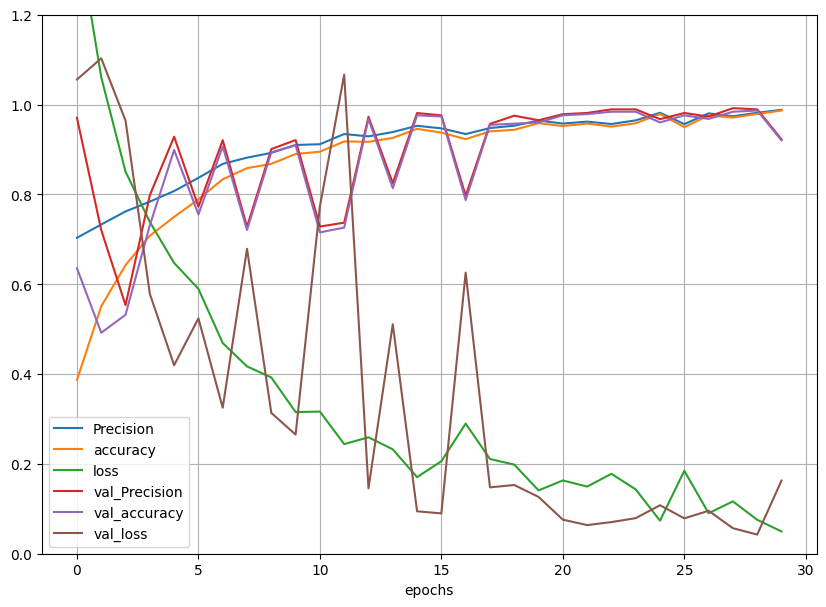

In [26]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid (True)
plt.gca().set_ylim(0,1.2)
plt.xlabel('epochs')
plt.show()

## New cases

In [27]:
test_loss,test_acc,test_prec=network.evaluate(X_test_prep,y_test_prep)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Precision: 0.9165 - accuracy: 0.9166 - loss: 0.2977


In [31]:
network.save('../models/speech_recognition_model.keras')
loaded_model=models.load_model('../models/speech_recognition_model.keras') 

/Users/ginovalverde/projects/deep_learning/dlenv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
